# **1. GENERAL**

# **2. ENVIRONMENT SETUP**

## **2.1 Extend package**

In [1]:
pip install tensorflow # type: ignore

  Using cached requests-2.32.5-py3-none-any.whl.metadata (4.9 kB)
  Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
  Using cached typing_extensions-4.15.0-py3-none-any.whl.metadata (3.3 kB)
  Using cached wheel-0.45.1-py3-none-any.whl.metadata (2.3 kB)
  Using cached rich-14.1.0-py3-none-any.whl.metadata (18 kB)
  Using cached charset_normalizer-3.4.3-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_28_x86_64.whl.metadata (36 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached urllib3-2.5.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl.metadata (1.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 1.6 MB/s eta 0:00:0000:0100:09m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 1.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 1.8 MB/s eta 0:00:0000:0100:01

In [2]:
pip install wandb # type: ignore

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install scikit-learn # type: ignore

  Using cached scikit_learn-1.7.2-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (11 kB)
  Using cached scipy-1.16.2-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (62 kB)
  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.7.2-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (9.5 MB)
Using cached joblib-1.5.2-py3-none-any.whl (308 kB)
Using cached scipy-1.16.2-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (35.7 MB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.


## **2.2 Library**

In [1]:
import wandb # type: ignore
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import wandb
from wandb.integration.keras import WandbCallback
# from google.colab import drive # type: ignore
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import LSTM, Dense, Dropout # type: ignore
from tensorflow.keras.optimizers import Adam # type: ignore
from tensorflow.keras.callbacks import EarlyStopping # type: ignore

2025-10-04 18:38:58.098698: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-10-04 18:38:58.099009: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-04 18:38:58.135161: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-10-04 18:38:58.989228: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off,

## **2.3 WanDB**


In [2]:
wandb.login(relogin=True) 

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /home/nguyen-quang-huy/.netrc
wandb: Currently logged in as: quanghuy71847 (quanghuy71847-ton-duc-thang-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

# **3. DATA LOADING**

## **3.1 Mounting**

In [3]:
"""
Attention:
- This data loading method only available on colab.
- For others platform, please follow their guide.
- For local environment, dont need
"""
# drive.mount('/content/drive')

'\nAttention:\n- This data loading method only available on colab.\n- For others platform, please follow their guide.\n- For local environment, dont need\n'

In [36]:
pd.set_option('display.max_columns', None) # Setup to show full columns in DataFrame

# df = pd.read_csv('/content/drive/MyDrive/data.csv')
df = pd.read_csv('2010_2025_dataset.csv') # For local environment

df.drop(columns=['day_of_week', 'day_of_year'],  inplace=True)

## **3.2 Quick glance**

In [5]:
df.head(1)

,date,latitude,longitude,target_pm25,pm25_lag_1d,pm10_lag_1d,no2_lag_1d,co,so2,o3,temperature_c,wind_speed_ms,wind_direction_deg,humidity_perc,pressure_hpa,tempo_no2_col,tempo_hcho_col
0,2017-01-02,29.733726,-95.257593,6.9,16.4,21.0,9.918182,0.20825,-0.38125,0.015353,20.532407,2.80372,233.483333,62.739131,1011.25,0.000169,0.000114


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65856 entries, 0 to 65855
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                65856 non-null  object 
 1   latitude            65856 non-null  float64
 2   longitude           65856 non-null  float64
 3   target_pm25         65856 non-null  float64
 4   pm25_lag_1d         65856 non-null  float64
 5   pm10_lag_1d         65856 non-null  float64
 6   no2_lag_1d          65856 non-null  float64
 7   co                  65856 non-null  float64
 8   so2                 65856 non-null  float64
 9   o3                  65856 non-null  float64
 10  temperature_c       65856 non-null  float64
 11  wind_speed_ms       65856 non-null  float64
 12  wind_direction_deg  65856 non-null  float64
 13  humidity_perc       65856 non-null  float64
 14  pressure_hpa        65856 non-null  float64
 15  tempo_no2_col       65856 non-null  float64
 16  temp

In [7]:
df.isna().sum()

date                  0
latitude              0
longitude             0
target_pm25           0
pm25_lag_1d           0
pm10_lag_1d           0
no2_lag_1d            0
co                    0
so2                   0
o3                    0
temperature_c         0
wind_speed_ms         0
wind_direction_deg    0
humidity_perc         0
pressure_hpa          0
tempo_no2_col         0
tempo_hcho_col        0
dtype: int64

In [8]:
df.describe()

,latitude,longitude,target_pm25,pm25_lag_1d,pm10_lag_1d,no2_lag_1d,co,so2,o3,temperature_c,wind_speed_ms,wind_direction_deg,humidity_perc,pressure_hpa,tempo_no2_col,tempo_hcho_col
count,65856.000000,65856.000000,65856.000000,65856.000000,65856.000000,65856.000000,65856.000000,65856.000000,65856.000000,65856.000000,65856.000000,65856.000000,65856.000000,65856.000000,65856.000000,65856.000000
mean,38.068678,-92.485904,8.324589,8.321052,19.280379,9.050311,0.239829,0.524236,0.029866,14.936669,2.130227,189.455813,60.359861,1154.775853,0.000299,0.000100
std,5.033817,14.749471,5.594531,5.629920,13.297600,6.277688,0.138186,0.928715,0.011266,10.401651,1.459428,64.201348,19.404840,1915.688527,0.000115,0.000028
min,27.965650,-147.727413,-4.247917,-4.247917,-1.000000,-4.463636,-0.210417,-1.720807,0.000000,-35.809028,0.000000,1.000000,0.000000,39.016667,0.000100,0.000050
25%,34.066590,-104.778334,4.812500,4.802778,11.000000,4.545833,0.166039,0.100000,0.021588,7.731482,1.151068,147.708333,47.833333,981.333333,0.000202,0.000076
50%,38.656429,-90.198348,7.225000,7.204167,16.500000,7.482609,0.208146,0.302083,0.029706,16.226852,1.774832,191.000000,62.875000,994.675000,0.000300,0.000100
75%,41.182227,-80.785683,10.545833,10.513385,24.000000,11.879167,0.278334,0.662500,0.037882,23.171296,2.732984,235.208333,74.458333,1008.083333,0.000398,0.000124
max,64.845690,-71.082600,190.704688,190.704688,445.000000,140.650000,2.297619,33.457143,0.074353,41.597222,14.899584,353.000000,100.000000,22388.750000,0.000500,0.000150


# **4. Preprocessing**

## **4.1 Standardize longitude and latitude**

In [37]:
def standardize_coor(df):
    df['lat_rad'] = np.radians(df['latitude'])
    df['lon_rad'] = np.radians(df['longitude'])

    df['x'] = np.cos(df['lat_rad']) * np.cos(df['lon_rad'])
    df['y'] = np.cos(df['lat_rad']) * np.sin(df['lon_rad'])
    df['z'] = np.sin(df['lat_rad'])

In [38]:
standardize_coor(df)

In [11]:
df

,date,latitude,longitude,target_pm25,pm25_lag_1d,pm10_lag_1d,no2_lag_1d,co,so2,o3,temperature_c,wind_speed_ms,wind_direction_deg,humidity_perc,pressure_hpa,tempo_no2_col,tempo_hcho_col,lat_rad,lon_rad,x,y,z
0,2017-01-02,29.733726,-95.257593,6.900000,16.400000,21.0,9.918182,0.208250,-0.381250,0.015353,20.532407,2.803720,233.483333,62.739131,1011.250000,0.000169,0.000114,0.518951,-1.662559,-0.079569,-0.864686,0.495970
1,2017-01-05,29.733726,-95.257593,15.700000,8.800000,14.0,7.558333,0.286230,-0.120833,0.008412,11.134259,2.272128,59.941667,64.880953,1013.166667,0.000465,0.000089,0.518951,-1.662559,-0.079569,-0.864686,0.495970
2,2017-01-08,29.733726,-95.257593,10.000000,8.200000,10.0,8.004167,0.294536,1.345341,0.023941,3.333333,1.794123,91.254167,43.604167,1038.583333,0.000107,0.000087,0.518951,-1.662559,-0.079569,-0.864686,0.495970
3,2017-01-11,29.733726,-95.257593,12.200000,10.200000,57.0,9.257895,0.222479,-0.422916,0.028118,21.967593,5.594578,191.612500,68.895833,1017.333333,0.000174,0.000098,0.518951,-1.662559,-0.079569,-0.864686,0.495970
4,2017-01-14,29.733726,-95.257593,6.700000,8.700000,21.5,9.145833,0.189125,-0.313636,0.028706,18.634259,2.171382,112.633333,79.541667,1026.916667,0.000368,0.000085,0.518951,-1.662559,-0.079569,-0.864686,0.495970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65851,2012-12-27,46.933754,-96.855350,9.041666,7.947222,11.0,14.000000,0.217104,0.766666,0.010824,-12.361111,1.560480,99.250000,79.916667,989.908333,0.000263,0.000141,0.819149,-1.690445,-0.081506,-0.677962,0.730565
65852,2012-12-28,46.933754,-96.855350,14.725000,9.041666,13.0,16.250000,0.286042,0.554167,0.025294,-12.407407,1.924878,212.125000,83.041667,986.616667,0.000450,0.000135,0.819149,-1.690445,-0.081506,-0.677962,0.730565
65853,2012-12-29,46.933754,-96.855350,10.383333,14.725000,17.0,15.500000,0.155667,1.318750,0.022059,-16.412037,2.514345,245.416667,77.666667,985.958333,0.000435,0.000102,0.819149,-1.690445,-0.081506,-0.677962,0.730565
65854,2012-12-30,46.933754,-96.855350,10.908333,10.383333,13.0,4.250000,0.185584,0.652084,0.026882,-11.134259,5.028690,219.125000,77.583333,983.175000,0.000193,0.000102,0.819149,-1.690445,-0.081506,-0.677962,0.730565


## **4.2 Calculate AQI**

In [12]:
# target_columns = ['pm25_lag_1d', 'pm10_lag_1d', 'no2_lag_1d', 'co', 'so2', 'o3']
target_columns = ['pm25_lag_1d', 'pm10_lag_1d', 'no2_lag_1d', 'co', 'so2', 'o3', 'temperature_c', 'wind_speed_ms', 'wind_direction_deg', 'humidity_perc', 'pressure_hpa', 'tempo_no2_col', 'tempo_hcho_col']

COLUMN_MAPPING = {
    'pm25_lag_1d': 'PM2.5',
    'pm10_lag_1d': 'PM10',
    'no2_lag_1d': 'NO2',
    'co': 'CO',
    'so2': 'SO2',
    'o3': 'O3'
}

BREAKPOINTS = {
    'PM2.5': [
        (0, 50, 0.0, 12.0),
        (51, 100, 12.1, 35.4),
        (101, 150, 35.5, 55.4),
        (151, 200, 55.5, 150.4),
        (201, 300, 150.5, 250.4),
        (301, 400, 250.5, 350.4),
        (401, 500, 350.5, 500.4),
    ],
    'PM10': [
        (0, 50, 0, 54),
        (51, 100, 55, 154),
        (101, 150, 155, 254),
        (151, 200, 255, 354),
        (201, 300, 355, 424),
        (301, 400, 425, 504),
        (401, 500, 505, 604),
    ],
    'NO2': [
        (0, 50, 0, 53),
        (51, 100, 54, 100),
        (101, 150, 101, 360),
        (151, 200, 361, 649),
        (201, 300, 650, 1249),
    ],
    'SO2': [
        (0, 50, 0, 35),
        (51, 100, 36, 75),
        (101, 150, 76, 185),
        (151, 200, 186, 304),
        (201, 300, 305, 604),
    ],
    'CO': [
        (0, 50, 0.0, 4.4),
        (51, 100, 4.5, 9.4),
        (101, 150, 9.5, 12.4),
        (151, 200, 12.5, 15.4),
        (201, 300, 15.5, 30.4),
    ],
    'O3': [
        (0, 50, 0, 54),
        (51, 100, 55, 70),
        (101, 150, 71, 85),
        (151, 200, 86, 105),
        (201, 300, 106, 200),
    ]
}

def calc_sub_aqi(pollutant, concentration):
    for (I_lo, I_hi, C_lo, C_hi) in BREAKPOINTS[pollutant]:
        if C_lo <= concentration <= C_hi:
            return ((I_hi - I_lo) / (C_hi - C_lo)) * (concentration - C_lo) + I_lo
    return np.nan

def calculate_aqi(df):
    # for col, pollutant in COLUMN_MAPPING.items():
    #     if col in df.columns:
    #         df[f"AQI_{pollutant}"] = df[col].apply(lambda x: calc_sub_aqi(pollutant, x))
    # df["AQI_Total"] = df[[f"AQI_{p}" for p in COLUMN_MAPPING.values() if f"AQI_{p}" in df.columns]].max(axis=1)
    df['AQI_Total'] = df[target_columns].max(axis=1)
    return df

In [42]:
calculate_aqi(df_scaled)

,date,latitude,longitude,target_pm25,pm25_lag_1d,pm10_lag_1d,no2_lag_1d,co,so2,o3,temperature_c,wind_speed_ms,wind_direction_deg,humidity_perc,pressure_hpa,tempo_no2_col,tempo_hcho_col,lat_rad,lon_rad,x,y,z,AQI_Total
0,2017-01-02,0.047941,0.684584,0.057183,0.105912,0.049327,0.099107,0.166930,0.038079,0.206488,0.727867,0.188174,0.660464,0.627391,0.043501,0.172862,0.642469,0.047941,0.684584,0.516075,0.016098,0.061958,0.727867
1,2017-01-05,0.047941,0.684584,0.102322,0.066929,0.033632,0.082845,0.198022,0.045482,0.113136,0.606453,0.152496,0.167448,0.648810,0.043587,0.912441,0.392138,0.047941,0.684584,0.516075,0.016098,0.061958,0.912441
2,2017-01-08,0.047941,0.684584,0.073084,0.063851,0.024664,0.085918,0.201334,0.087161,0.321991,0.505674,0.120414,0.256404,0.436042,0.044724,0.017048,0.369068,0.047941,0.684584,0.516075,0.016098,0.061958,0.505674
3,2017-01-11,0.047941,0.684584,0.084369,0.074110,0.130045,0.094557,0.172603,0.036895,0.378169,0.746408,0.375486,0.541513,0.688958,0.043773,0.185778,0.476948,0.047941,0.684584,0.516075,0.016098,0.061958,0.746408
4,2017-01-14,0.047941,0.684584,0.056157,0.066416,0.050448,0.093785,0.159305,0.040001,0.386077,0.703345,0.145734,0.317140,0.795417,0.044202,0.669301,0.348071,0.047941,0.684584,0.516075,0.016098,0.061958,0.795417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65851,2012-12-27,0.514319,0.663738,0.068168,0.062554,0.026906,0.127236,0.170460,0.070711,0.145576,0.302920,0.104733,0.279119,0.799167,0.042546,0.406951,0.907785,0.514319,0.663738,0.513139,0.304182,0.599743,0.907785
65852,2012-12-28,0.514319,0.663738,0.097321,0.068168,0.031390,0.142741,0.197947,0.064670,0.340188,0.302322,0.129190,0.599787,0.830417,0.042399,0.875270,0.850011,0.514319,0.663738,0.513139,0.304182,0.599743,0.875270
65853,2012-12-29,0.514319,0.663738,0.075050,0.097321,0.040359,0.137572,0.145964,0.086405,0.296679,0.250587,0.168753,0.694366,0.776667,0.042369,0.838794,0.517826,0.514319,0.663738,0.513139,0.304182,0.599743,0.838794
65854,2012-12-30,0.514319,0.663738,0.077743,0.075050,0.031390,0.060047,0.157893,0.067454,0.361546,0.318770,0.337505,0.619673,0.775833,0.042245,0.232295,0.524032,0.514319,0.663738,0.513139,0.304182,0.599743,0.775833


## **4.2 Remove no need columns**

In [14]:
# df.drop(columns=['target_pm25', 'longitude', 'latitude', 'target_pm25', 'pm25_lag_1d', 'pm10_lag_1d', 'no2_lag_1d', 'co', 'so2', 'o3'], inplace=True)
df.drop(columns=['target_pm25', 'longitude', 'latitude', 'target_pm25'], inplace=True)

In [15]:
df.to_csv("2010_2025_4.2.csv", index=False)

## **4.3 Min max scaler**

In [33]:
import joblib
from sklearn.preprocessing import MinMaxScaler

exclude_cols = ['date']

def __min_max_scaler(df, save_path='scaler.pkl'):
    cols_to_scale = df.columns.difference(exclude_cols)
    scaler = MinMaxScaler()
    df_scaled = df.copy()
    df_scaled[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])
    df_scaled[exclude_cols] = df[exclude_cols]

    joblib.dump(scaler, save_path)
    print(f"✅ Scaler saved to {save_path}")

    return df_scaled, scaler

In [39]:
df_scaled, _ = __min_max_scaler(df)

✅ Scaler saved to scaler.pkl


In [41]:
df_scaled

,date,latitude,longitude,target_pm25,pm25_lag_1d,pm10_lag_1d,no2_lag_1d,co,so2,o3,temperature_c,wind_speed_ms,wind_direction_deg,humidity_perc,pressure_hpa,tempo_no2_col,tempo_hcho_col,lat_rad,lon_rad,x,y,z
0,2017-01-02,0.047941,0.684584,0.057183,0.105912,0.049327,0.099107,0.166930,0.038079,0.206488,0.727867,0.188174,0.660464,0.627391,0.043501,0.172862,0.642469,0.047941,0.684584,0.516075,0.016098,0.061958
1,2017-01-05,0.047941,0.684584,0.102322,0.066929,0.033632,0.082845,0.198022,0.045482,0.113136,0.606453,0.152496,0.167448,0.648810,0.043587,0.912441,0.392138,0.047941,0.684584,0.516075,0.016098,0.061958
2,2017-01-08,0.047941,0.684584,0.073084,0.063851,0.024664,0.085918,0.201334,0.087161,0.321991,0.505674,0.120414,0.256404,0.436042,0.044724,0.017048,0.369068,0.047941,0.684584,0.516075,0.016098,0.061958
3,2017-01-11,0.047941,0.684584,0.084369,0.074110,0.130045,0.094557,0.172603,0.036895,0.378169,0.746408,0.375486,0.541513,0.688958,0.043773,0.185778,0.476948,0.047941,0.684584,0.516075,0.016098,0.061958
4,2017-01-14,0.047941,0.684584,0.056157,0.066416,0.050448,0.093785,0.159305,0.040001,0.386077,0.703345,0.145734,0.317140,0.795417,0.044202,0.669301,0.348071,0.047941,0.684584,0.516075,0.016098,0.061958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65851,2012-12-27,0.514319,0.663738,0.068168,0.062554,0.026906,0.127236,0.170460,0.070711,0.145576,0.302920,0.104733,0.279119,0.799167,0.042546,0.406951,0.907785,0.514319,0.663738,0.513139,0.304182,0.599743
65852,2012-12-28,0.514319,0.663738,0.097321,0.068168,0.031390,0.142741,0.197947,0.064670,0.340188,0.302322,0.129190,0.599787,0.830417,0.042399,0.875270,0.850011,0.514319,0.663738,0.513139,0.304182,0.599743
65853,2012-12-29,0.514319,0.663738,0.075050,0.097321,0.040359,0.137572,0.145964,0.086405,0.296679,0.250587,0.168753,0.694366,0.776667,0.042369,0.838794,0.517826,0.514319,0.663738,0.513139,0.304182,0.599743
65854,2012-12-30,0.514319,0.663738,0.077743,0.075050,0.031390,0.060047,0.157893,0.067454,0.361546,0.318770,0.337505,0.619673,0.775833,0.042245,0.232295,0.524032,0.514319,0.663738,0.513139,0.304182,0.599743


In [ ]:
df_scaled.to_csv("2010_2025_4.4.csv", index=False)

## **4.5 Sort by date**

In [43]:
df_scaled["date"] = pd.to_datetime(df_scaled["date"], errors="coerce")
df_scaled = df_scaled.sort_values("date").reset_index(drop=True)

assert df_scaled["date"].is_monotonic_increasing
df_scaled.index = pd.to_datetime(df_scaled['date'], format='%Y-%m-%d')

## **4.6 Data splitting**

In [44]:
target_col = "AQI_Total"

def create_sequences(data, target_col, lookback):
    X, y, dates = [], [], []
    for i in range(len(data) - lookback):
        seq_X = data.iloc[i:i+lookback].drop(columns=['date', target_col]).values
        seq_y = data.iloc[i+lookback][target_col]
        seq_date = data.iloc[i+lookback]['date']
        X.append(seq_X)
        y.append(seq_y)
        dates.append(seq_date)
    return np.array(X), np.array(y), np.array(dates)

In [45]:
lookback = 7
X, y, dates = create_sequences(df_scaled, target_col, lookback)

In [46]:
X_train, X_test, y_train, y_test, dates_train, dates_test = train_test_split(
    X, y, dates, test_size=0.2, shuffle=False
)

# **5. Training**

## **5.1 Hyperparam config**

In [47]:
wandb.init(project="NASA_AIR_QUALITY_FORECASTING", name="lstm_v1_simpleaqi_unit64_drop_d02ense32relu_dense1_batch32_1e-5",     config={
        "model": "LSTM",
        "units": 64,
        "dropout": 0.2,
        "batch_size": 32,
        "epochs": 50,
        "dense_units": 32,
        "loss": "mse",
        "optimizer": "adam",
        "learning_rate": 1e-5
    })

wandb: ERROR The nbformat package was not found. It is required to save notebook history.


epoch,▁▁▂▂▃▃▄▄▅▅▆▆▇▇██
loss,█▄▃▃▂▂▂▂▁▁▁▁▁▁▁▁
val_loss,█▄▂▁▁▂▁▁▁▁▁▁▁▁▁▁
best_epoch,10
best_val_loss,0.0001
epoch,15
loss,0.00885
val_loss,0.00011


## **5.2 Training**

In [48]:
config = wandb.config
model = Sequential([
    LSTM(config.units, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False),
    Dropout(config.dropout),
    Dense(32, activation='relu'),
    Dense(1)
])

optimizer = Adam(learning_rate=config.learning_rate)
model.compile(optimizer=optimizer, loss='mse')

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

history = model.fit(
    X_train, y_train,
    epochs=config.epochs,
    batch_size=config.batch_size,
    validation_data=(X_test, y_test),
    callbacks=[
        WandbCallback(save_model=False, save_weights_only=False, save_graph=False),
        early_stop
    ],
    verbose=1
)

Epoch 1/50


/home/nguyen-quang-huy/GITHUB/My_Repo/AirForce/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1647/1647 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.1061 - val_loss: 0.0100
Epoch 2/50
1647/1647 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.0214 - val_loss: 0.0088
Epoch 3/50
1647/1647 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0174 - val_loss: 0.0089
Epoch 4/50
1647/1647 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.0148 - val_loss: 0.0086
Epoch 5/50
1647/1647 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.0134 - val_loss: 0.0085
Epoch 6/50
1647/1647 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0125 - val_loss: 0.0086
Epoch 7/50
1647/1647 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0119 - val_loss: 0.0085
Epoch 8/50
1647/1647 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0114 - val_loss: 0.0084
Epoch 9/50
1647/1647 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.0111 - val_loss: 0.0085
Epoch 10/50
1647/1647 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0108 - val_loss: 0.0083
Epoch 11/50
1647/1647 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.0106 - val_loss: 0.0082
Epoch 12/50
1647/1647 ━━━━━━━━━━━━━━━━━

## **5.3 True vs Predicted Value**

412/412 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


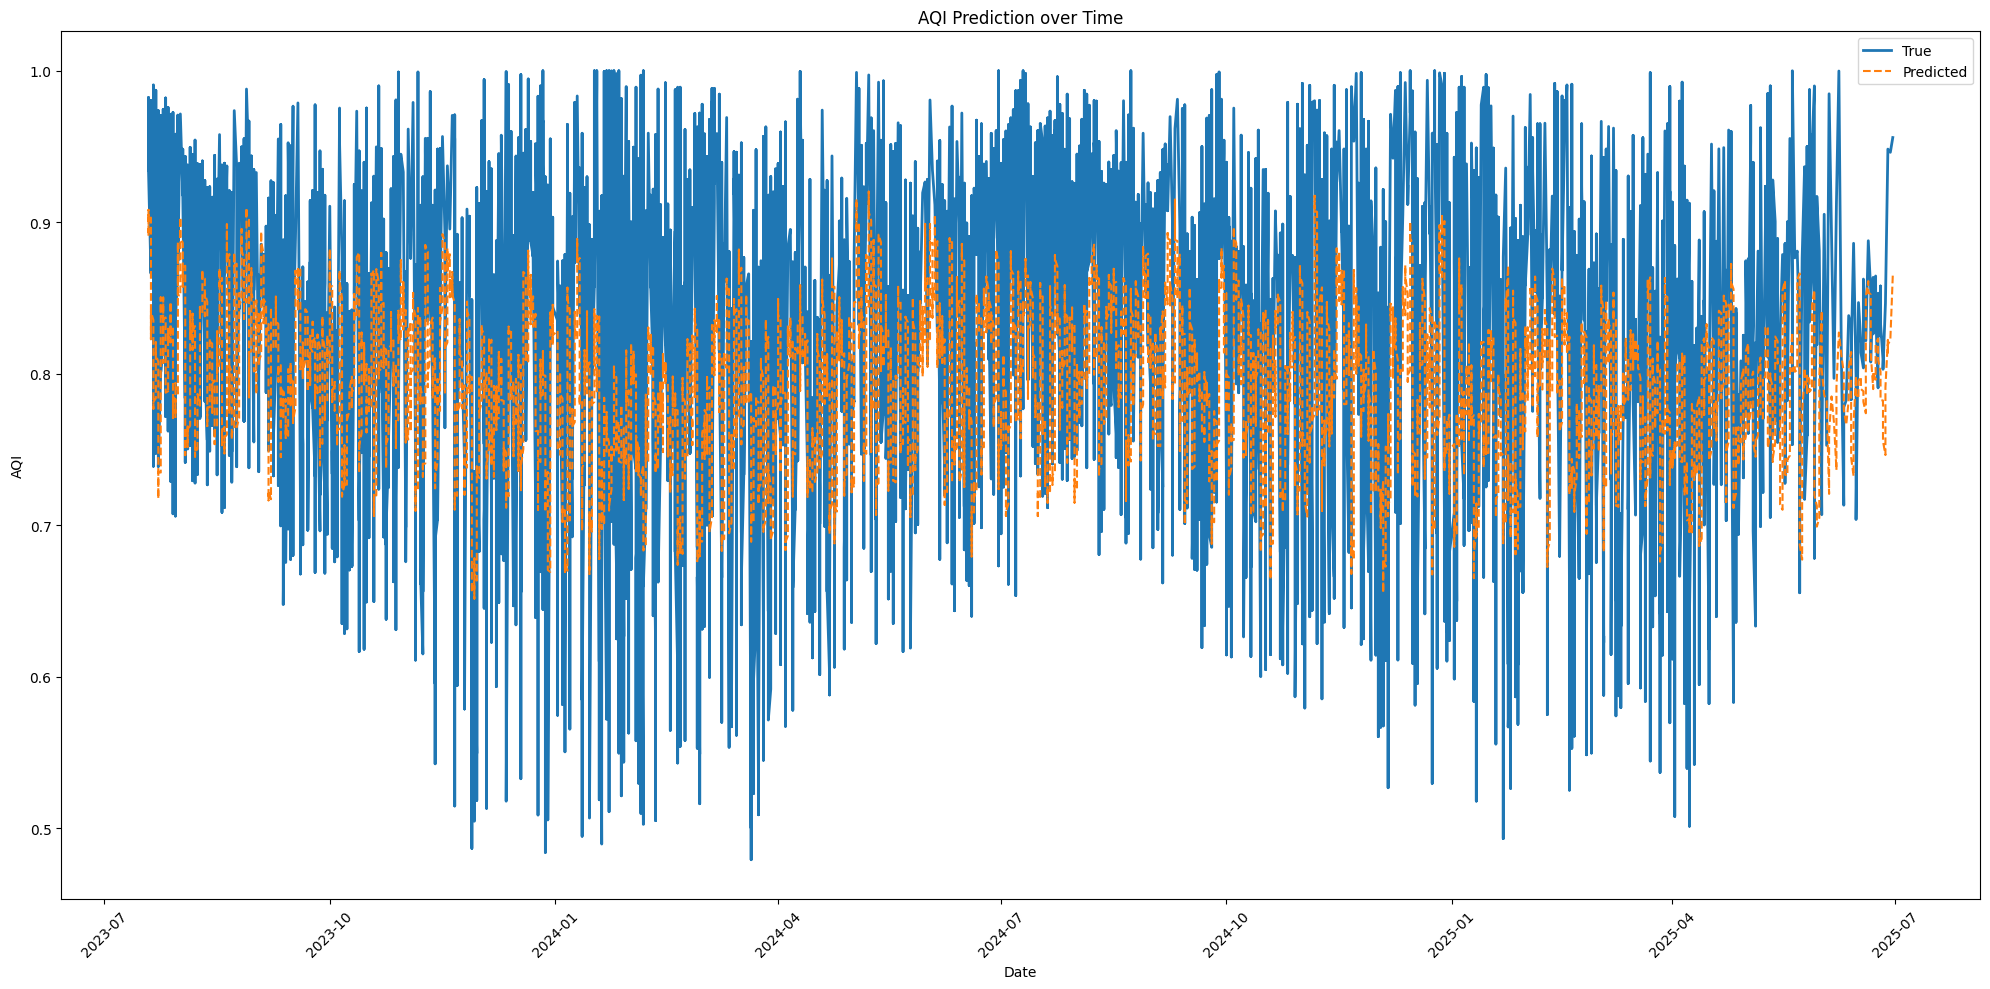

<Figure size 640x480 with 0 Axes>

In [49]:
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

plt.figure(figsize=(20, 10))
plt.plot(dates_test, y_test, label='True', linewidth=2)
plt.plot(dates_test, y_pred, label='Predicted', linestyle='--')
plt.legend()
plt.title("AQI Prediction over Time")
plt.xlabel("Date")
plt.ylabel("AQI")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.savefig("truevspredicted.png", dpi=300, bbox_inches='tight')

## **5.4 Train loss vs Val loss**

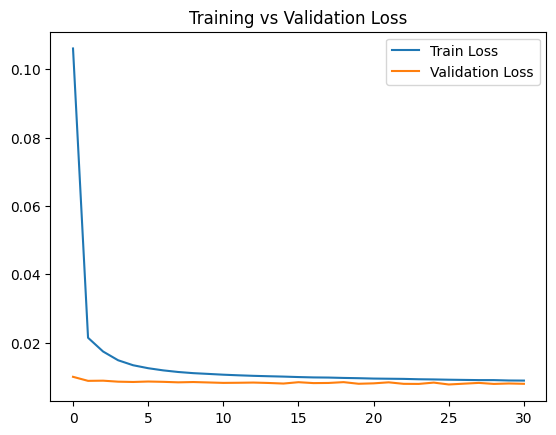

In [50]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Training vs Validation Loss")

plt.savefig("loss_curve.png", dpi=300, bbox_inches='tight')

In [51]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE:  {mae:.3f}")
print(f"MSE:  {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R2 :  {r2:.3f}")


MAE:  0.071
MSE:  0.008
RMSE: 0.088
R2 :  0.217


In [55]:
df_scaled.to_csv("scaled.csv")

# **6. Saving model**

In [54]:
model.save('lstm_global_model.keras', include_optimizer=True)

# **7. Testing**